<a href="https://www.kaggle.com/code/agneypraseed/gemini-api-in-kaggle?scriptVersionId=155983702" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
GOOGLE_AI_STUDIO = user_secrets.get_secret("GOOGLE_AI_STUDIO")

In [6]:
# setup
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [7]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)

models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


### curl response structure

curl -H 'Content-Type: application/json' -d '{ "prompt": { "text": "Write a story about a magic backpack"} }' "https://generativelanguage.googleapis.com/v1beta3/models/text-bison-001:generateText?key=API_KEY

"candidates": [
    {
      ,
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_DEROGATORY",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_TOXICITY",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_VIOLENCE",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_SEXUAL",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_MEDICAL",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_DANGEROUS",
          "probability": "NEGLIGIBLE"
        }
      ]
    }
  ]


#### Running Gemini Pro

In [19]:
model = genai.GenerativeModel('gemini-pro')

In [20]:
response = model.generate_content("Explain the three way Quick sort")

In [21]:
Markdown(response.text)

Three-way quicksort is a variant of the quicksort algorithm that uses three partitions instead of two. This can be more efficient than the standard two-way quicksort in certain situations, such as when the input data is already partially sorted or when there are many duplicate elements.

The algorithm works as follows:

1. Choose a pivot element from the input data.
2. Partition the input data into three parts:
    * Elements less than the pivot
    * Elements equal to the pivot
    * Elements greater than the pivot
3. Recursively apply the algorithm to the three partitions.

This process is repeated until the entire input data has been partitioned and sorted.

The main benefit of three-way quicksort over two-way quicksort is that it can avoid the worst-case scenario of the two-way quicksort, which occurs when the pivot element is the smallest or largest element in the input data. In the worst case, two-way quicksort can have a time complexity of O(n^2), where n is the number of elements in the input data. Three-way quicksort, on the other hand, has a worst-case time complexity of O(n log n), which is the same as the average-case time complexity.

However, three-way quicksort is more complex to implement than two-way quicksort, and it is not always clear which algorithm is better for a given input data set. In general, two-way quicksort is a good choice for most data sets, but three-way quicksort can be a better choice for data sets that are already partially sorted or that contain many duplicate elements.

Here is an example of how three-way quicksort works:

```
Input data: [5, 3, 8, 2, 1, 4, 7, 6]

Pivot: 4

Partition the input data into three parts:
* Elements less than the pivot: [3, 2, 1]
* Elements equal to the pivot: [4]
* Elements greater than the pivot: [8, 7, 6]

Recursively apply the algorithm to the three partitions:
* Partition 1: [3, 2, 1]
    * Pivot: 2
    * Partition 1 into three parts:
        * Elements less than the pivot: [1]
        * Elements equal to the pivot: [2]
        * Elements greater than the pivot: [3]
    * Recursively apply the algorithm to the three partitions:
        * Partition 1: [1]
            * No more elements to partition, so stop.
        * Partition 2: [2]
            * No more elements to partition, so stop.
        * Partition 3: [3]
            * No more elements to partition, so stop.
* Partition 2: [4]
    * No more elements to partition, so stop.
* Partition 3: [8, 7, 6]
    * Pivot: 7
    * Partition 3 into three parts:
        * Elements less than the pivot: [6]
        * Elements equal to the pivot: [7]
        * Elements greater than the pivot: [8]
    * Recursively apply the algorithm to the three partitions:
        * Partition 1: [6]
            * No more elements to partition, so stop.
        * Partition 2: [7]
            * No more elements to partition, so stop.
        * Partition 3: [8]
            * No more elements to partition, so stop.

The sorted input data: [1, 2, 3, 4, 5, 6, 7, 8]
```

In [22]:
# Show if our prompt violates any
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [25]:
# Response as a Stream
response = model.generate_content("Give some examples of seq-seq models", stream=True)

In [32]:
if not response.parts:
    print("No text found in response.")
else:
    for chunk in response.parts:
        print(chunk.text)

1. **Neural Machine Translation (NMT)**: NMT models are used to translate text from one language to another. They typically consist of an encoder-decoder architecture, where the encoder converts the source sentence into a fixed-length vector representation, and the decoder generates the target sentence word by word based on the encoder's output. Examples of NMT models include the Transformer model, the Recurrent Neural Network (RNN) Encoder-Decoder model, and the Convolutional Neural Network (CNN) Encoder-Decoder model.


2. **Text Summarization**: Seq-seq models are used to summarize text by extracting the most important information and generating a shorter, more concise version. These models typically consist of an encoder-decoder architecture, where the encoder converts the input text into a fixed-length vector representation, and the decoder generates the summary word by word based on the encoder's output. Examples of text summarization models include the abstractive summarization 

## Setup/Configuring the Model

In [37]:
# Set up the model
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


prompt_parts = [
  "How can Transformer architecture be used to solve Computer vision tasks ?",
]


response = model.generate_content(prompt_parts)
Markdown(response.text)

1. **Image Classification:**
   - Use a pre-trained Transformer model (e.g., ViT, Swin Transformer) as a backbone to extract features from an image.
   - Add a fully connected layer on top of the Transformer's output to predict class probabilities.

2. **Object Detection:**
   - Use a Transformer-based model to generate a set of bounding boxes and class probabilities for each object in an image.
   - This can be achieved by using a Transformer-based encoder to extract features from the image and a Transformer-based decoder to predict the bounding boxes and class probabilities.

3. **Semantic Segmentation:**
   - Use a Transformer-based model to predict a mask for each pixel in an image, where each mask represents the class of the corresponding pixel.
   - This can be achieved by using a Transformer-based encoder to extract features from the image and a Transformer-based decoder to predict the masks.

4. **Instance Segmentation:**
   - Use a Transformer-based model to predict a mask and a unique identifier for each instance of an object in an image.
   - This can be achieved by using a Transformer-based encoder to extract features from the image and a Transformer-based decoder to predict the masks and instance IDs.

5. **Panoptic Segmentation:**
   - Use a Transformer-based model to predict a mask for each pixel in an image, where each mask represents the class of the corresponding pixel or the instance ID of an object instance.
   - This can be achieved by using a Transformer-based encoder to extract features from the image and a Transformer-based decoder to predict the masks and instance IDs.

6. **Depth Estimation:**
   - Use a Transformer-based model to predict the depth of each pixel in an image.
   - This can be achieved by using a Transformer-based encoder to extract features from the image and a Transformer-based decoder to predict the depth values.

7. **3D Object Detection:**
   - Use a Transformer-based model to predict the bounding box, orientation, and class of each 3D object in a scene.
   - This can be achieved by using a Transformer-based encoder to extract features from the scene and a Transformer-based decoder to predict the bounding boxes, orientations, and class probabilities of the objects.

In [38]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

### Examaple of Safety Ratings

In [52]:
prompt_parts = [
  "Give me a list of reasons as to why women should take care of the house hold chores",
]

response = model.generate_content(prompt_parts)
Markdown(response.text)

There is no one-size-fits-all answer to this question, as the division of household chores between partners can vary depending on a number of factors, such as their work schedules, personal preferences, and individual abilities. However, here are some of the reasons why women might be expected to take care of the household chores:

- **Historical norms and expectations:** In many societies, there is a cultural expectation that women should be responsible for the care of the home and children. This is based on the idea that women are naturally more suited to these tasks, and that they have a greater responsibility for the upbringing of children.


- **Gender roles:** In some cultures, gender roles are still very traditional, with women being expected to take on the role of homemaker, while men are expected to be the breadwinner. This can lead to women taking on the majority of the household chores, even if they have a full-time job.


- **Women's greater availability:** For many centuries, it was more likely that women would be at home during the day while men were out working. This meant that women had more time to take care of the household chores, while men were less likely to be involved. In recent years, this has changed somewhat as more women have entered the workforce, but the traditional division of labor still persists in many families.


- **Women's physical abilities:** On average, women tend to be smaller and have less physical strength than men. This can make it more difficult for them to perform physically demanding tasks around the house, such as moving heavy furniture or doing yard work.


- **Social pressure:** In some cultures, there is a social stigma attached to men who do household chores. This can make it difficult for men to feel comfortable taking on these tasks, even if they are willing to do so.


It is important to note that these are just some of the reasons why women might be expected to take care of the household chores. There is no one right or wrong answer to this question, and the division of labor between partners should be based on what works best for them and their individual circumstances.

In [53]:
print(response.prompt_feedback)

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}



### Chat with Gemini

In [54]:

# Set up the model
generation_config = {
  "temperature": 0.7,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}


safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]

model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


chat = model.start_chat(history=[])


chat.send_message("Tell me about the GTA 6")

Markdown(chat.last.text)

Grand Theft Auto VI (GTA 6) is the highly anticipated next installment in the popular Grand Theft Auto series developed by Rockstar Games. While Rockstar has yet to officially announce the game, numerous rumors, leaks, and speculations have surfaced, painting a picture of what players can expect from GTA 6.

1. Setting:
- It is widely believed that GTA 6 will return to Vice City, a fictionalized version of Miami, which was previously featured in Grand Theft Auto: Vice City (2002).
- The game is said to have a larger and more detailed map, spanning multiple cities and regions.

2. Characters and Story:
- Rumors suggest that GTA 6 will feature two playable protagonists, a male and a female character, breaking away from the series' tradition of single protagonists.
- The story is said to revolve around the criminal underworld, power struggles, and the rise of a new empire in Vice City.

3. Gameplay and Features:
- GTA 6 is expected to offer a more immersive and dynamic experience with improved graphics, physics, and AI.
- New gameplay mechanics, such as swimming and climbing, are rumored to be included.
- The game is said to have a greater focus on stealth and hand-to-hand combat, alongside the traditional vehicular gameplay.

4. Release Date:
- Rockstar Games has not officially announced a release date for GTA 6, but it is widely speculated that the game will be released in 2024 or later.

5. Platforms:
- GTA 6 is expected to be released on next-generation consoles, including the PlayStation 5, Xbox Series X/S, and possibly also on PC.

It is important to note that all of the above information is based on rumors and leaks, and nothing has been officially confirmed by Rockstar Games. The developers are known for their secrecy, and concrete details about GTA 6 will likely only be revealed closer to its release.

In [55]:
chat.send_message("Tell me the main characters name and when it is likely to be released")

Markdown(chat.last.text)

**Main Characters:**

Rumors and leaks suggest that Grand Theft Auto VI (GTA 6) will feature two playable protagonists, breaking away from the series' tradition of single protagonists. The names of these characters have not been officially revealed, but they are commonly referred to as:

- **Jason** (Codename): A male character who is said to be a veteran criminal and a skilled getaway driver.
- **Lucia** (Codename): A female character who is described as a hacker and a master of disguise.

**Release Date:**

Rockstar Games has not officially announced a release date for GTA 6, but it is widely speculated that the game will be released in **late 2024 or early 2025**. This speculation is based on various factors, including the development time of previous GTA games, job listings at Rockstar, and rumors from industry insiders.

It is important to note that these are just speculations, and the actual release date could be different. Rockstar Games is known for taking their time with their games, and they will likely only announce the release date when they are confident that the game is ready.

We will have to wait for an official announcement from Rockstar Games to know for sure when GTA 6 will be released.

#### Chat History

In [57]:
chat.history

[parts {
   text: "Tell me about the GTA 6"
 }
 role: "user",
 parts {
   text: "Grand Theft Auto VI (GTA 6) is the highly anticipated next installment in the popular Grand Theft Auto series developed by Rockstar Games. While Rockstar has yet to officially announce the game, numerous rumors, leaks, and speculations have surfaced, painting a picture of what players can expect from GTA 6.\n\n1. Setting:\n- It is widely believed that GTA 6 will return to Vice City, a fictionalized version of Miami, which was previously featured in Grand Theft Auto: Vice City (2002).\n- The game is said to have a larger and more detailed map, spanning multiple cities and regions.\n\n2. Characters and Story:\n- Rumors suggest that GTA 6 will feature two playable protagonists, a male and a female character, breaking away from the series\' tradition of single protagonists.\n- The story is said to revolve around the criminal underworld, power struggles, and the rise of a new empire in Vice City.\n\n3. Gameplay

In [56]:
for message in chat.history:
  display(Markdown(f'**{message.role}**: {message.parts[0].text}'))

**user**: Tell me about the GTA 6

**model**: Grand Theft Auto VI (GTA 6) is the highly anticipated next installment in the popular Grand Theft Auto series developed by Rockstar Games. While Rockstar has yet to officially announce the game, numerous rumors, leaks, and speculations have surfaced, painting a picture of what players can expect from GTA 6.

1. Setting:
- It is widely believed that GTA 6 will return to Vice City, a fictionalized version of Miami, which was previously featured in Grand Theft Auto: Vice City (2002).
- The game is said to have a larger and more detailed map, spanning multiple cities and regions.

2. Characters and Story:
- Rumors suggest that GTA 6 will feature two playable protagonists, a male and a female character, breaking away from the series' tradition of single protagonists.
- The story is said to revolve around the criminal underworld, power struggles, and the rise of a new empire in Vice City.

3. Gameplay and Features:
- GTA 6 is expected to offer a more immersive and dynamic experience with improved graphics, physics, and AI.
- New gameplay mechanics, such as swimming and climbing, are rumored to be included.
- The game is said to have a greater focus on stealth and hand-to-hand combat, alongside the traditional vehicular gameplay.

4. Release Date:
- Rockstar Games has not officially announced a release date for GTA 6, but it is widely speculated that the game will be released in 2024 or later.

5. Platforms:
- GTA 6 is expected to be released on next-generation consoles, including the PlayStation 5, Xbox Series X/S, and possibly also on PC.

It is important to note that all of the above information is based on rumors and leaks, and nothing has been officially confirmed by Rockstar Games. The developers are known for their secrecy, and concrete details about GTA 6 will likely only be revealed closer to its release.

**user**: Tell me the main characters name and when it is likely to be released

**model**: **Main Characters:**

Rumors and leaks suggest that Grand Theft Auto VI (GTA 6) will feature two playable protagonists, breaking away from the series' tradition of single protagonists. The names of these characters have not been officially revealed, but they are commonly referred to as:

- **Jason** (Codename): A male character who is said to be a veteran criminal and a skilled getaway driver.
- **Lucia** (Codename): A female character who is described as a hacker and a master of disguise.

**Release Date:**

Rockstar Games has not officially announced a release date for GTA 6, but it is widely speculated that the game will be released in **late 2024 or early 2025**. This speculation is based on various factors, including the development time of previous GTA games, job listings at Rockstar, and rumors from industry insiders.

It is important to note that these are just speculations, and the actual release date could be different. Rockstar Games is known for taking their time with their games, and they will likely only announce the release date when they are confident that the game is ready.

We will have to wait for an official announcement from Rockstar Games to know for sure when GTA 6 will be released.

### Gemini Pro Vision (Image tasks)

In [73]:
!curl -o image_to_analyse.jpg https://raw.githubusercontent.com/Agneypraseed/Kaggle/main/Random%20Forrest%20Tree.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  826k  100  826k    0     0  2557k      0 --:--:-- --:--:-- --:--:-- 2560k


In [79]:
!curl -o avatar.jpg https://raw.githubusercontent.com/Agneypraseed/Kaggle/main/My_AVATAR.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115k  100  115k    0     0   267k      0 --:--:-- --:--:-- --:--:--  266k


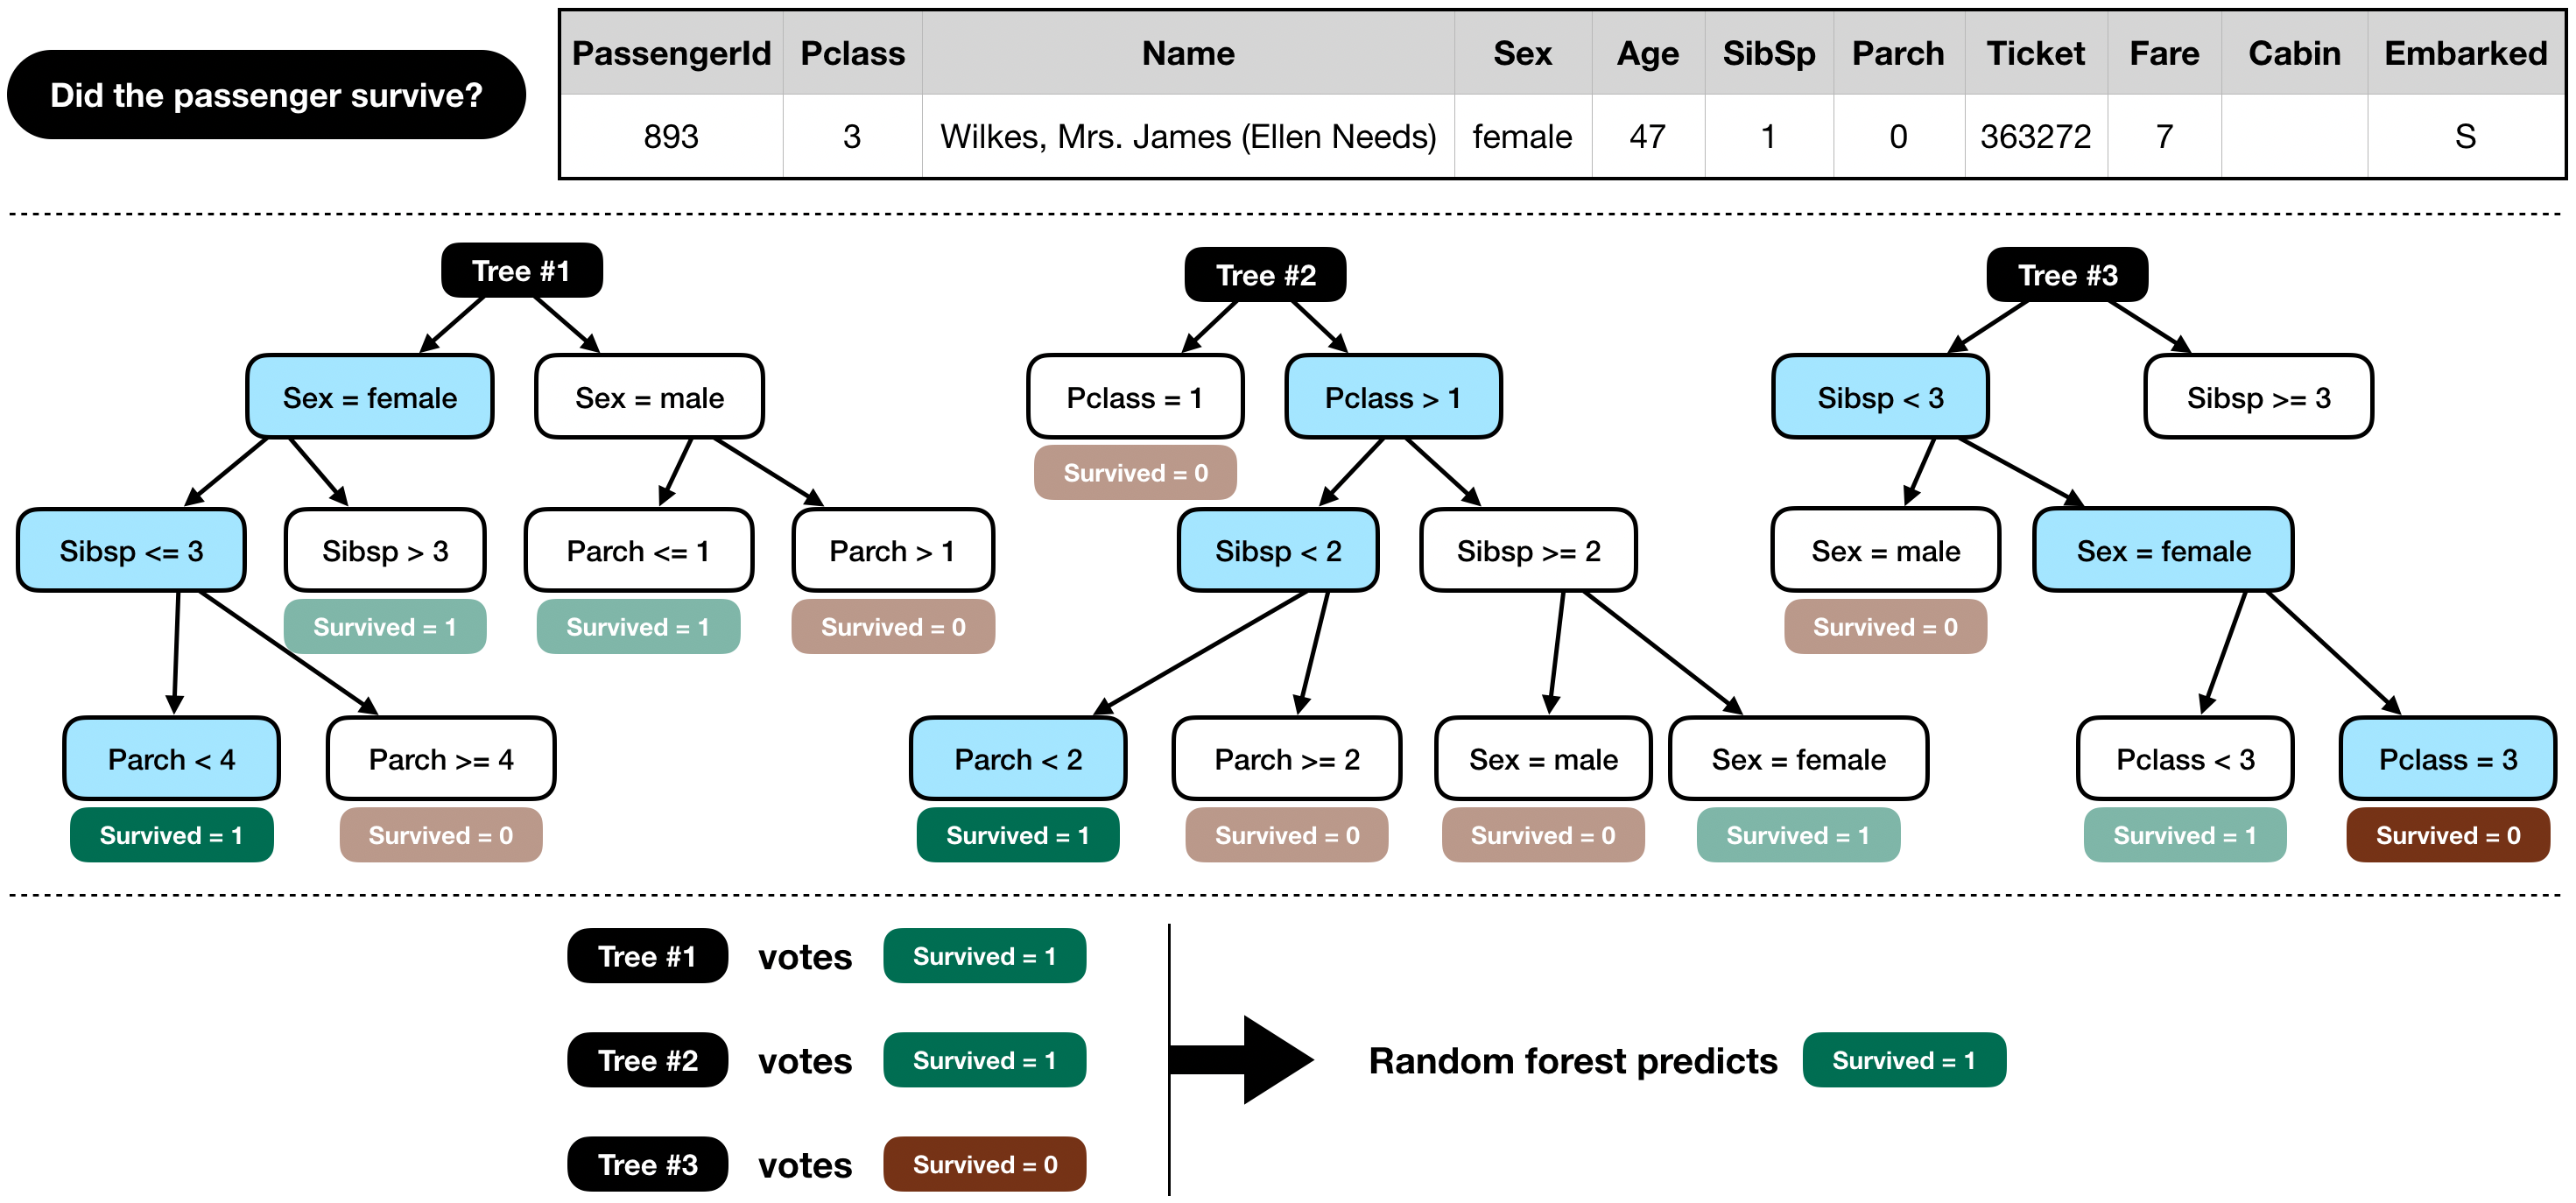

In [81]:
import PIL.Image

img1 = PIL.Image.open('/kaggle/working/image_to_analyse.jpg')
img1

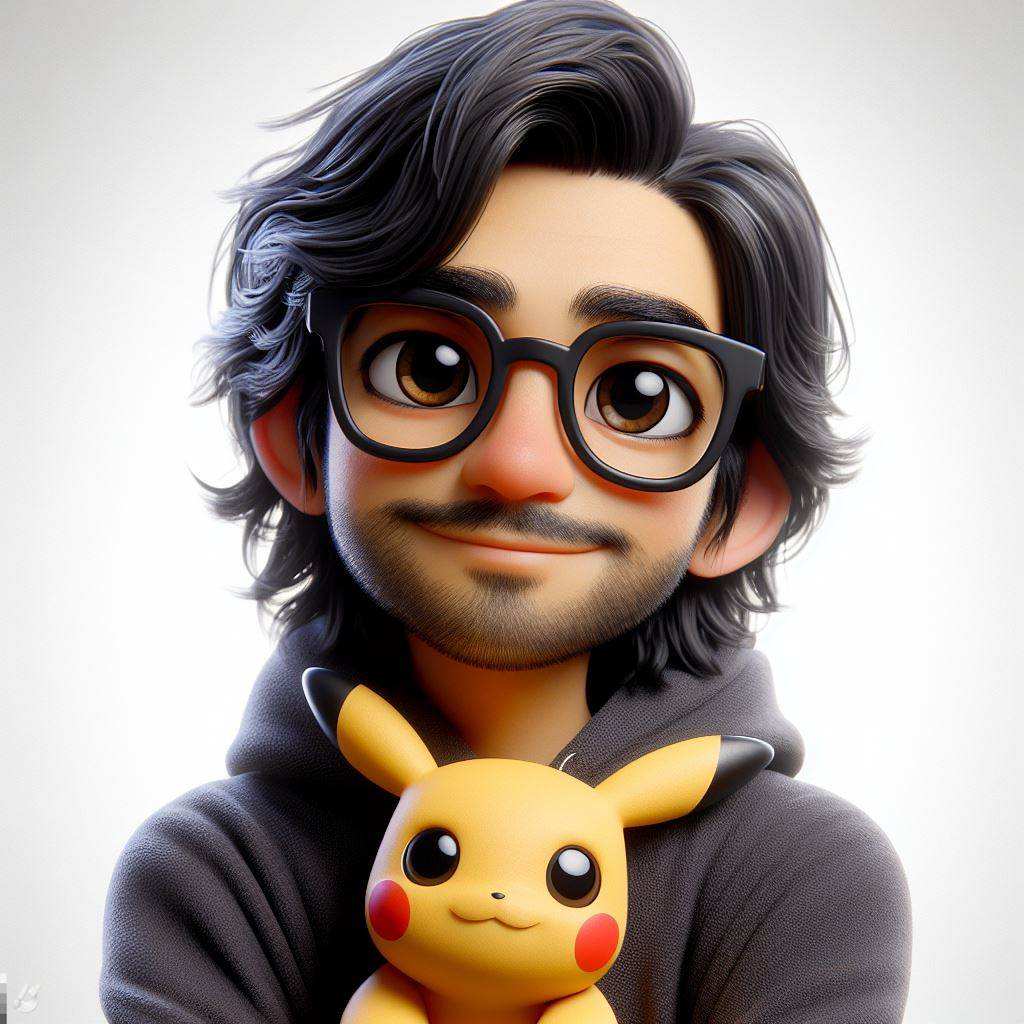

In [90]:
import PIL.Image

img2 = PIL.Image.open('/kaggle/working/avatar.jpg')
img2

In [82]:
model = genai.GenerativeModel('gemini-pro-vision')

In [83]:
new_size = (200, 200)
img1 = img1.resize(new_size)

In [85]:
response = model.generate_content(img1)

Markdown(response.text)

 The image shows a random forest classifier, which is an ensemble learning algorithm that creates a multitude of decision trees at training time and outputs the class that is most commonly predicted by the decision trees.

In this example, the random forest classifier is used to predict whether a passenger survived or not. The decision trees in the random forest are trained on different subsets of the data, and each tree makes a prediction about the passenger's survival. The final prediction is made by taking the majority vote of the decision trees.

The image also shows the feature importance, which is a measure of how important each feature is in making the prediction. The most important feature is the passenger's sex, followed by the passenger's age and the passenger's class.

In [86]:
response = model.generate_content(["Did the passenger survive, show the steps on how you came to the conclusion:", img1], stream=True)
response.resolve()

In [87]:
Markdown(response.text)

 The passenger did not survive.

The first step is to identify the features that are important in determining whether or not a passenger survived. The decision tree shows that the most important features are sex, age, and class.

The next step is to use these features to make a prediction about whether or not the passenger survived. The decision tree predicts that the passenger did not survive.

In [91]:
response = model.generate_content(img2)

Markdown(response.text)

 This is a cartoon image of a person with glasses, a beard, and long black hair. They are wearing a black hoodie and holding a yellow Pokemon character.

In [92]:
response = model.generate_content(["Give me a detailed prompt that can be used to genrate such an image",img2 ], stream=True)
response.resolve()

In [93]:
Markdown(response.text)

 3D render of a young man with black hair and brown eyes. He is wearing glasses, a black hoodie, and has a Pikachu plush toy in his hands. The background is white and the man is smiling.

In [94]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

[Google doc](https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb)